In [ ]:
# Install necessary libraries
!pip install pandas seaborn matplotlib scikit-learn tensorflow

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# Load the dataset from Google Drive (assuming you've uploaded it to your Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Read the dataset
data = pd.read_csv('/content/drive/MyDrive/FinalDataset.tsv', sep='\t', error_bad_lines=False)
with open('/content/drive/MyDrive/FinalDataset.tsv', 'r') as file:
    lines = file.readlines()

# Print the problematic line to inspect it
print(lines[17088])  # Indexing starts from 0, so line 17089 would be at index 17088



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
US	37583130	R22FVINYLW2VU0	B006Z921ES	746740183	Power One Size 312 MERCURY FREE Hearing Aid Batteries (60 batteries)	Personal_Care_Appliances	4	0	0	N	Y	Quick delivery and good price	Been using this brand in my maskers for a while now.  Quality is consistent, but some batteries seem to only have half the life of what I normally get.  Like that they are mercury free.  Very quick delivery and good price.  Would definitely order from this seller again.	2015-08-06



<ipython-input-3-c911f7e645e3>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/FinalDataset.tsv', sep='\t', error_bad_lines=False)
Skipping line 17089: expected 15 fields, saw 22



In [ ]:
print(data.head())


  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     17747349  R2EI7QLPK4LF7U  B00U7LCE6A       106182406   
1          US     10956619  R1W5OMFK1Q3I3O  B00HRJMOM4       162269768   
2          US     13132245   RPZWSYWRP92GI  B00P31G9PQ       831433899   
3          US     35717248  R2WQWM04XHD9US  B00FGDEPDY       991059534   
4          US     17710652  R1WSPK2RA2PDEF  B00FZ0FK0U       574904556   

                                       product_title  product_category  \
0                           CCleaner Free [Download]  Digital_Software   
1                 ResumeMaker Professional Deluxe 18  Digital_Software   
2                          Amazon Drive Desktop [PC]  Digital_Software   
3         Norton Internet Security 1 User 3 Licenses  Digital_Software   
4  SecureAnywhere Intermet Security Complete 5 De...  Digital_Software   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            4              0            

In [ ]:
print(data.dtypes)


marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
review_length         int64
dtype: object


In [ ]:
print(data['star_rating'].value_counts())


5    12921
1     2736
4     2251
3     1174
2      863
Name: star_rating, dtype: int64


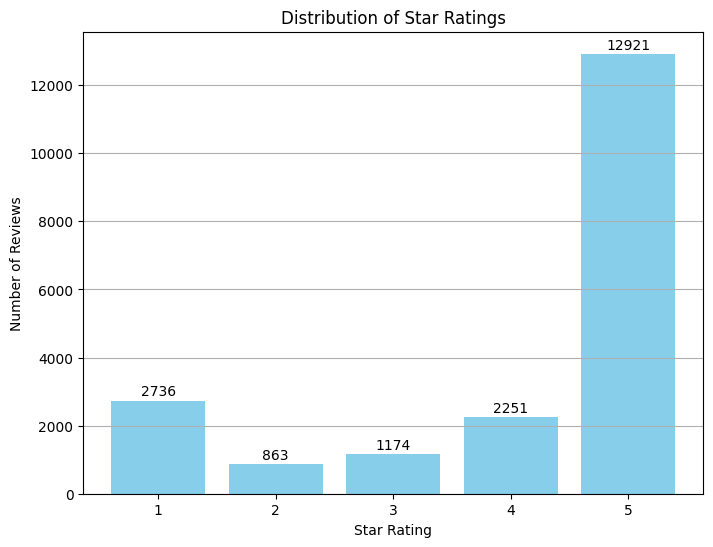

In [ ]:
# Extract the value counts
ratings_counts = data['star_rating'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(ratings_counts.index, ratings_counts.values, color='skyblue')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom')

plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



In [ ]:
!pip install wordcloud


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define stopwords (common words that don't carry significant meaning)
stopwords = set(STOPWORDS)

# Categorize reviews:
# Positive (4-5 stars), Neutral (3 stars), Negative (1-2 stars)
positive_reviews = ' '.join(data[data['star_rating'] > 3]['review_body'].astype(str))
neutral_reviews = ' '.join(data[data['star_rating'] == 3]['review_body'].astype(str))
negative_reviews = ' '.join(data[data['star_rating'] < 3]['review_body'].astype(str))


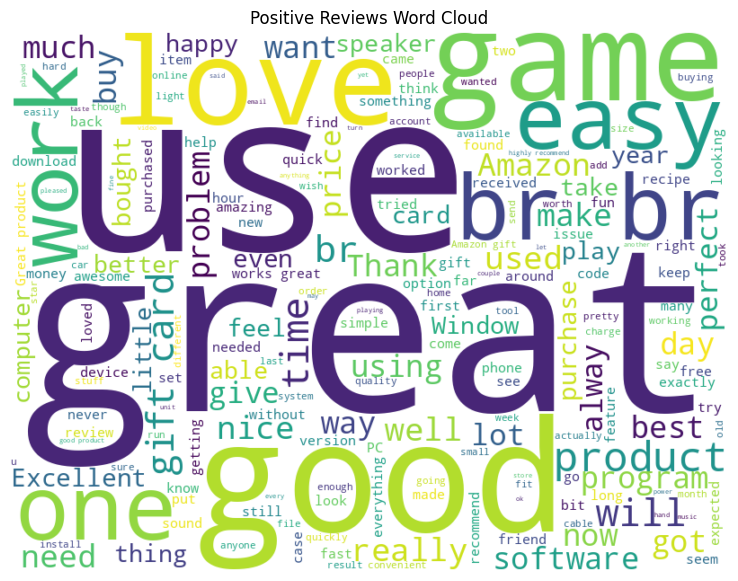

In [ ]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=600).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for positive, neutral, and negative reviews
generate_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')


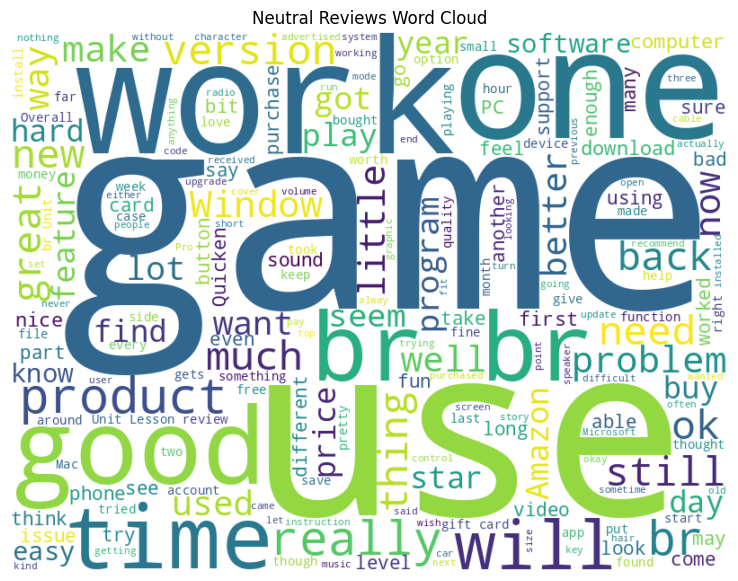

In [ ]:
generate_wordcloud(neutral_reviews, 'Neutral Reviews Word Cloud')

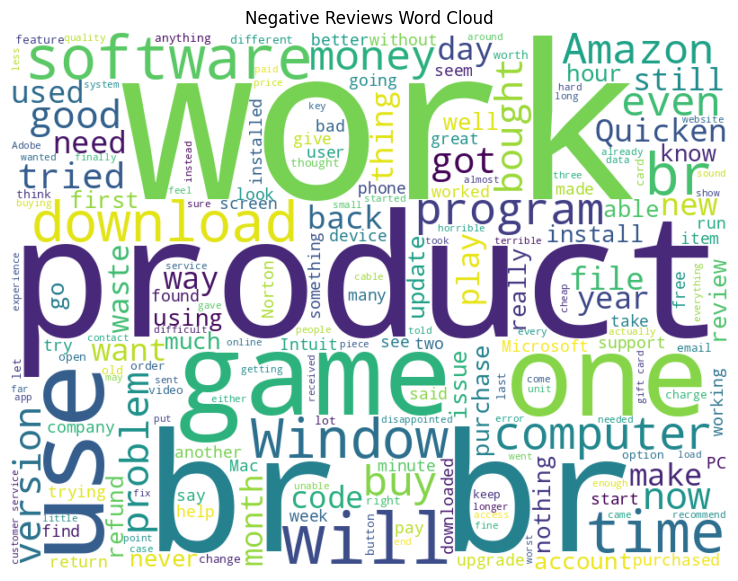

In [ ]:
generate_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')

In [ ]:
# Calculate the number of words in each review
data['review_length'] = data['review_body'].apply(lambda x: len(str(x).split()))


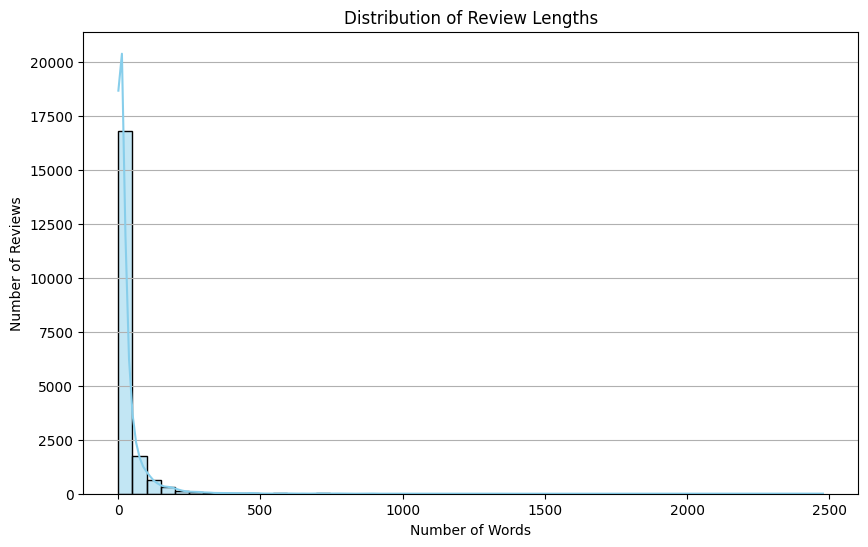

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=50, color='skyblue', kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()


In [ ]:
def classify_sentiment(rating):
    if rating in [4, 5]:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['star_rating'].apply(classify_sentiment)


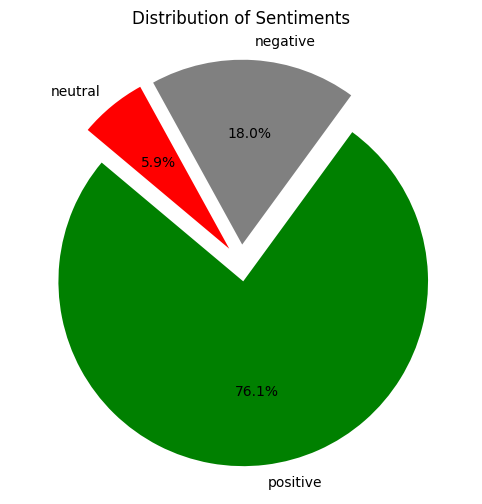

In [ ]:
# Calculate sentiment distribution
sentiment_counts = data['sentiment'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'], explode=(0.1, 0.1, 0.1))
plt.title('Distribution of Sentiments')
plt.ylabel('')  # Hide the 'sentiment' ylabel
plt.show()


In [ ]:
print(data['product_category'].value_counts())


Personal_Care_Appliances    4454
Digital_Software            3999
Digital_Video_Games         3999
Gift Card                   3999
Mobile_Electronics          3494
Name: product_category, dtype: int64


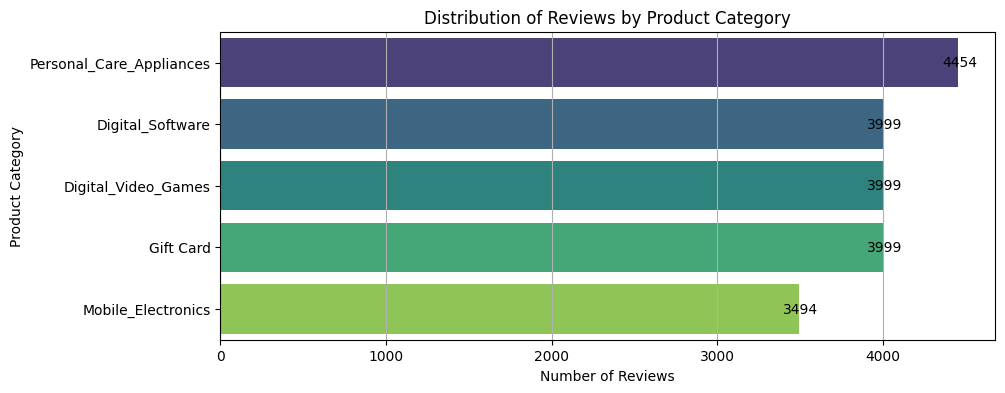

In [ ]:
plt.figure(figsize=(10, 4))
bars = sns.countplot(y=data['product_category'], order=data['product_category'].value_counts().index, palette='viridis')
plt.title('Distribution of Reviews by Product Category')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Category')
plt.grid(axis='x')

# Add labels on each bar
for p in bars.patches:
    width = p.get_width()    # get bar length
    bars.text(width + 10,       # set the text at 10 units right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'center',   # horizontal alignment
            va = 'center')  # vertical alignment

plt.show()


In [ ]:
# Splitting the data into training and testing sets
X = data['review_body']
y = data['star_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization for ML models
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Tokenization and Padding for DL models
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=100, padding='post', truncating='post')


In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)
lr_predictions = lr_model.predict(X_test_vec)

# Evaluation
print(classification_report(y_test, lr_predictions))


              precision    recall  f1-score   support

           1       0.67      0.69      0.68       541
           2       0.46      0.03      0.06       176
           3       0.43      0.11      0.18       209
           4       0.38      0.10      0.16       451
           5       0.79      0.98      0.87      2612

    accuracy                           0.75      3989
   macro avg       0.55      0.38      0.39      3989
weighted avg       0.69      0.75      0.69      3989



In [ ]:
# Deep Learning Model
dl_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
dl_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
dl_model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_test_pad, y_test))

# Evaluation
dl_loss, dl_accuracy = dl_model.evaluate(X_test_pad, y_test)
print(f"Accuracy: {dl_accuracy*100:.2f}%")


Epoch 1/10
499/499 [==============================] - 5s 7ms/step - loss: 1.1276 - accuracy: 0.6425 - val_loss: 0.9882 - val_accuracy: 0.6638
Epoch 2/10
499/499 [==============================] - 3s 6ms/step - loss: 0.9068 - accuracy: 0.6909 - val_loss: 0.8472 - val_accuracy: 0.7072
Epoch 3/10
499/499 [==============================] - 5s 9ms/step - loss: 0.8012 - accuracy: 0.7262 - val_loss: 0.7910 - val_accuracy: 0.7320
Epoch 4/10
499/499 [==============================] - 2s 5ms/step - loss: 0.7486 - accuracy: 0.7427 - val_loss: 0.7785 - val_accuracy: 0.7313
Epoch 5/10
499/499 [==============================] - 2s 4ms/step - loss: 0.7110 - accuracy: 0.7541 - val_loss: 0.7573 - val_accuracy: 0.7418
Epoch 6/10
499/499 [==============================] - 2s 4ms/step - loss: 0.6795 - accuracy: 0.7630 - val_loss: 0.7503 - val_accuracy: 0.7408
Epoch 7/10
499/499 [==============================] - 2s 4ms/step - loss: 0.6476 - accuracy: 0.7739 - val_loss: 0.7436 - val_accuracy: 0.7438
Epoch 